# 퍼셉트론

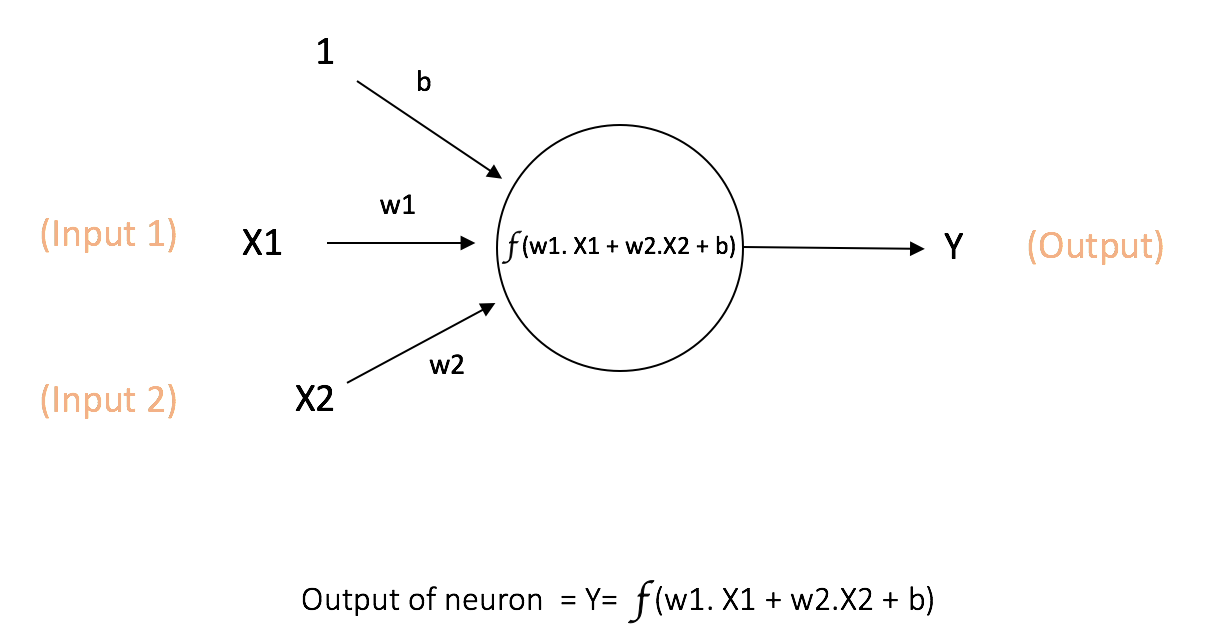



## 밑바닥부터 시작하는 딥러닝 3장

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from PIL import Image

## 3층 신경망
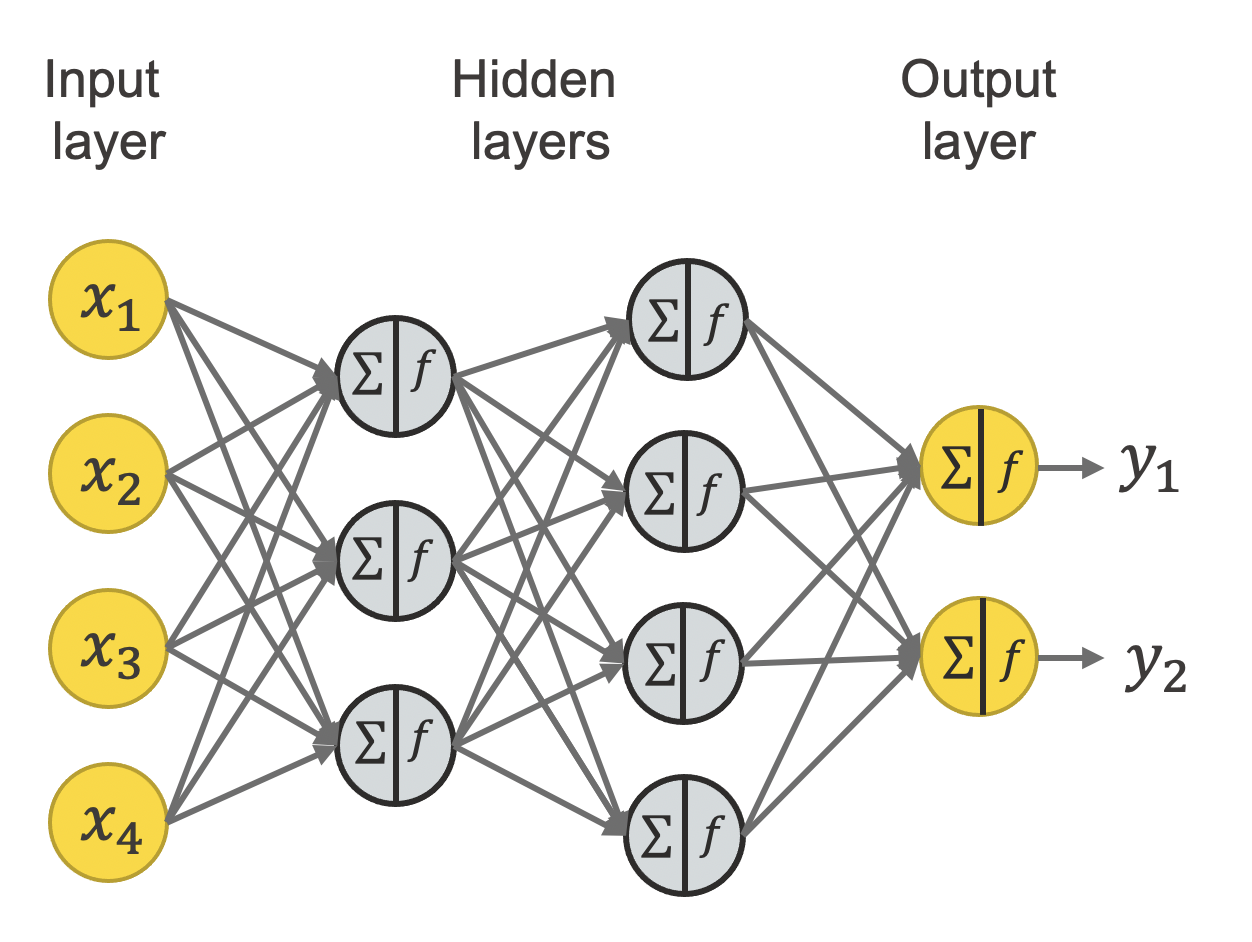
* 0층(입력층)
* 1 ~ 2층(은닉층) 
* 3층(출력층)

# 중요한 표기법

$w_{12}^{(1)}$
* (1): 1층의 가중치
* 1: 다음 층의 1번째 뉴런(도착지)
* 2: 앞 층의 2번째 뉴런(출발지)

## 퍼셉트론 1개
* 입력: $a_{1}^{1}=w_{11}^{(1)}x_1+w_{12}^{(1)}x_2+b_1$
* 출력: $h(a)$, $h()$ is activation function

## 1층의 전체 입력
* 입력: $A^{(1)}=XW^{(1)}+B^{(1)}$
* 이때의 행렬은 다음과 같음
* $A^{(1)}=(a_1^{(1)}, a_2^{(1)}, a_3^{(1)}), X=(x_1, x_2), B^{(1)}=(b_1^{(1)}, b_2^{(1)}, b_3^{(1)}), W^{(1)}=\begin{bmatrix}w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\ w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}\end{bmatrix}$

In [3]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# 일반적으로 Regression 문제에는 identity_function을, Classification 문제에는 softmax를 이용한다.
def identity_function(x):
  return x

def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c) # Overflow 방지(수식 참고)
  y = exp_a / np.sum(exp_a) # 0과 1사이의 범위를 가지는 실수, 또한 모든 출력의 총합은 1(확률과 동일)
  return y

# define neural network
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.2, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.3, 0.3], [0.2], 0.4])
  network['b3'] = np.array([0.1, 0.2])

  return network

# 신경망의 순방향 연산
def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  # activation input, output
  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

## Classification

In [4]:
import pickle
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/sample_weight.pkl'

def get_data():
  (x_train, t_train), (x_test, t_test) = keras.datasets.mnist.load_data()
  x_train = x_train.reshape(60000, -1)
  x_test = x_test.reshape(10000, -1)
 
  print('x_train.shape: ', x_train.shape)
  print('t_train.shape: ', t_train.shape)
  print('x_test.shape: ', x_test.shape)
  print('t_test.shape: ', t_test.shape)

  return x_test, t_test

# define neural network
def init_network():
  with open(file_path, 'rb') as f:
    network = pickle.load(f)

  return network

def print_shape(*args):
  for i in args:
    print('shape: {}'.format(i.shape))  

# 신경망의 순방향 연산
def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  # activation input, output
  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

Mounted at /content/drive


In [6]:
x, t = get_data()
network = init_network() 
# W1: 도착지가 다음층의 1번노드, W2: 도착지가 다음층의 2번노드, W3: 도착지가 다음층의 3번 노드
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print_shape(x[0], W1, W2, W3)

'''
배치 크기(묶음),
배치 처리를 통해 느린 I/O동작을 통한 데이터를 읽는 횟수가 줄어, CPU나 GPU로 순수계산을 수행하는 비율이 높아짐
'''
batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size): # len(x) is 10000
  x_batch = x[i:i+batch_size] # 1차원 인덱싱(각 행에 접근)
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1) # 확률이 가장 높은 원소의 인덱스를 얻는다.
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print('Accuracy:' + str(float(accuracy_cnt) / len(x)))

x_train.shape:  (60000, 784)
t_train.shape:  (60000,)
x_test.shape:  (10000, 784)
t_test.shape:  (10000,)


FileNotFoundError: ignored

# 신경망 각 층의 배열형상의 추이
> $X\;\;\;\;W1\;\;\;\;\;\;\;\;\;W2\;\;\;\;\;\;\;\;\;\;W3 \;\;\;\;\;\;\rightarrow Y$   
> $784\;\;784*50\;\;50*100\;\;100*10\;\;\;\;10$

# 신경망 각 층의 배열형상의 추이(배치 적용)
> $X\;\;\;\;\;\;\;\;\;\;\;\;\;\;W1\;\;\;\;\;\;\;\;\;W2\;\;\;\;\;\;\;\;\;W3 \;\;\;\;\;\;\rightarrow Y$   
> $100*784\;\;784*50\;\;50*100\;\;100*10\;\;\;\;100*10$